## Линейные модели в машинном обучении

**Описание проекта:**

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».


Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих коровок!


Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:

1. Первая будет прогнозировать возможный удой коровы (*целевой признак Удой*);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (*целевой признак Вкус молока*).

С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

**Цель проекта:** Разработать линейную модель машинного обучения, которая позволит фермеру, владельцу молочного хозяйства "Вольный луг", управлять рисками и принимать объективные решения о покупках.

**Описание данных:**

**1.** Файл **ferma_main.csv** содержит данные о стаде фермера на текущий момент. 
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

**2.** Файл **ferma_dad.csv** хранит имя папы каждой коровы в стаде фермера. 
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

**3.** Файл **cow_buy.csv** — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее 2 лет, более 2 лет).

**План работы с проектом:**
1. Загрузка и изучение данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Проведение корреляционного анализа признаков в датасете ferma_main.csv;
5. Задача регресии;
6. Задача классификации;
7. Формирование итоговых выводов.

## 1 шаг. Загрузка и изучение данных

In [1]:
# загрузим библиотеки, необходимые для работы
import pandas as pd
import numpy as np
from scipy import stats

# загрузим библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# загрузим модули для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# загрузим модули для линейной регрессии
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# загрузим модули для логистической регрессии
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### 1.1 Загрузка и изучение данных датафрейма 'ferma_main.csv'

Файл **ferma_main.csv** содержит данные о стаде фермера на текущий момент. 

**Описание данных:**
- id — уникальный идентификатор коровы.
- Удой, кг — масса молока, которую корова даёт в год (в килограммах).
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
- Сырой протеин, г — содержание сырого протеина в корме (в граммах).
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Жирность,% — содержание жиров в молоке (в процентах).
- Белок,% — содержание белков в молоке (в процентах).
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Признаки в датасете **ferma_main.csv** можно разделить на группы.
1. Характеристики коровы: id, Порода, порода папы_быка, Возраст.
2. Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).
3. Характеристика пастбища: Тип пастбища.
4. Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

In [2]:
# загрузим данные из датафрейма 'ferma_main.csv'
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep = ';')

In [3]:
# посмотрим первые 10 строк датафрейма
ferma_main.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
5,6,5254,"12,7",1806,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,13","3,078",вкусно,менее_2_лет
6,7,5910,"13,2",1792,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,48","3,077",вкусно,более_2_лет
7,8,6179,"14,7",1806,"0,93",Вис Бик Айдиал,Равнинные,Айдиал,"3,55","3,076",вкусно,более_2_лет
8,9,6783,"14,2",1918,"0,94",РефлешнСоверинг,Холмистое,Айдиал,"3,71","3,077",вкусно,более_2_лет
9,10,5339,"13,4",1791,"0,895",Вис Бик Айдиал,Холмистое,Соверин,"3,13","3,075",вкусно,менее_2_лет


In [4]:
# посмотрим общую инфрмацию о датафрейме
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

**Примечание:** По полученным результатам видно, что для корректной работы необходимо изменить тип данных в некоторых столбцах и привести названия столбцов к общему стилю. Пропуски в данных отсутствуют. Данные соответсвуют описанию задачи.

### 1.2 Загрузка и изучение данных датафрейма 'ferma_dad.csv'

Файл **ferma_dad.csv** хранит имя папы каждой коровы в стаде фермера. 

**Описание данных:**
- id — уникальный идентификатор коровы.
- Имя Папы — имя папы коровы.

In [5]:
# загрузим данные из датафрейма 'ferma_dad.csv'
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';')

In [6]:
# посмотрим первые 10 строк датафрейма
ferma_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [7]:
# посмотрим общую информацию о датафрейме
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


**Примечание:** По полученным результатам видно, что названия столбцов необходимо привести к общему стилю. Тип данных для столбцов указан корректно, пропуски отсутствуют. Данные соответствуют описанию задачи.

### 1.3 Загрузка и изучение данных датафрейма 'cow_buy.csv'

Файл **cow_buy.csv** — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. 

**Описание данных:**
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Данные в файлах **ferma_main.csv** и **cow_buy.csv** похожи, но у датасета **cow_buy.csv** несколько особенностей.

1. Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
2. Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют. Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.
3. Кроме того, отсутствуют признаки Удой, кг и Вкус молока. Это целевые признаки, их необходимо предсказать.

In [8]:
# загрузим данные из датафрейма 'cow_buy.csv'
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep = ';')

In [9]:
# посмотрим первые 10 строк датафрейма
cow_buy.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


In [10]:
# посмотрим общую информацию о датафрейме
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


**Примечание:** По полученным результатам видно, что для корректной работы необходимо изменить тип данных в некоторых столбцах, а также привести названия столбцов к общему стил. Пропуски в данных отсутствуют. Данные соответствуют описанию задачи.


**Обобщающий вывод этапа "Загрузка и изучение данных":** 
1. Данные в трех таблицах соответсвуют описани задачи.
2. В данных отсутствуют пропуски.
3. В каждой таблице необходимо привести названия столбцов к общему стилю.
4. В двух таблицах для корректной работы необходимо изменить тип данных.

## 2 шаг. Предобработка данных

### 2.1 Предобработка данных в таблице 'ferma_main'

In [11]:
# по результатам загрузки данных стало видно, что в таблице 'ferma_main' названия столбцов необходимо привести к общему стилю
# выведем все названия столбцов
ferma_main.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [12]:
# переименуем столбцы к общепринятому стилю
ferma_main = ferma_main.rename(columns={
    'Удой, кг' : 'milk_yield',
    'ЭКЕ (Энергетическая кормовая единица)' : 'energy_feed_unit',
    'Сырой протеин, г' : 'crude_protein',
    'СПО (Сахаро-протеиновое соотношение)' : 'sugar_protein_ratio',
    'Порода' : 'breed',
    'Тип пастбища' : 'type_of_pasture',
    'порода папы_быка' : 'daddys_breed',
    'Жирность,%' : 'fat_content',
    'Белок,%' : 'protein',
    'Вкус молока' : 'taste_of_milk',
    'Возраст' : 'age'
})

In [13]:
# выведем первые 5 строк таблицы с переименованными столбцами
ferma_main.head()

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,type_of_pasture,daddys_breed,fat_content,protein,taste_of_milk,age
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [14]:
# посмотрим количество пропусков в данных
ferma_main.isna().sum()

id                     0
milk_yield             0
energy_feed_unit       0
crude_protein          0
sugar_protein_ratio    0
breed                  0
type_of_pasture        0
daddys_breed           0
fat_content            0
protein                0
taste_of_milk          0
age                    0
dtype: int64

**Примечание:** Пропуски в данных отсутствуют.

In [15]:
# проверим датафрейм на наличие явных дубликатов
ferma_main.duplicated().sum()

5

**Примечание:** В данных присутствует 5 явных дубликатов.

In [16]:
# выведем таблицу с явными дубликатами
ferma_main[ferma_main.duplicated()]

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,type_of_pasture,daddys_breed,fat_content,protein,taste_of_milk,age
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
633,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


**Примечание:** В таблице правда присутствует пять полностью одинаковых строк, поэтому явные дубликаты можно удалить.

In [17]:
# удалим явные дубликаты
ferma_main = ferma_main.drop_duplicates()

# проверим количество явных дубликатов после удаления
print('Количество явных дубликатов после удаления:', ferma_main.duplicated().sum())

Количество явных дубликатов после удаления: 0


In [18]:
# проверим данные на наличие неявных дубликатов
# посмотрим значения в столбцах: 'breed', 'type_of_pasture', 'daddys_bread'
print('Уникальные значения в столбце "breed":', ferma_main['breed'].unique())
print('Уникальные значения в столбце "type_of_pasture":', ferma_main['type_of_pasture'].unique())
print('Уникальные значения в столбце "daddys_breed":', ferma_main['daddys_breed'].unique())

Уникальные значения в столбце "breed": ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце "type_of_pasture": ['Равнинное' 'Равнинные' 'Холмистое']
Уникальные значения в столбце "daddys_breed": ['Айдиал' 'Соверин' 'Айдиалл']


In [19]:
# заменим значения, которые могли привести к появлению неявных дубликатов
ferma_main['breed'] = ferma_main['breed'].replace('РефлешнСоверинг', 'Рефлешн Соверинг')
ferma_main['type_of_pasture'] = ferma_main['type_of_pasture'].replace('Равнинные', 'Равнинное')
ferma_main['daddys_breed'] = ferma_main['daddys_breed'].replace('Айдиалл', 'Айдиал')

In [20]:
# посмотрим уникальные значения в столбцах после замены
print('Уникальные значения в столбце "breed":', ferma_main['breed'].unique())
print('Уникальные значения в столбце "type_of_pasture":', ferma_main['type_of_pasture'].unique())
print('Уникальные значения в столбце "daddys_breed":', ferma_main['daddys_breed'].unique())

Уникальные значения в столбце "breed": ['Вис Бик Айдиал' 'Рефлешн Соверинг']
Уникальные значения в столбце "type_of_pasture": ['Равнинное' 'Холмистое']
Уникальные значения в столбце "daddys_breed": ['Айдиал' 'Соверин']


**Примечание:** Замена проведена успешно.

In [21]:
# поменяем типы данных в некоторых столбцах
ferma_main['energy_feed_unit'] = ferma_main['energy_feed_unit'].str.replace(',', '.').astype('float')
ferma_main['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].str.replace(',', '.').astype('float')
ferma_main['fat_content'] = ferma_main['fat_content'].str.replace(',', '.').astype('float')
ferma_main['protein'] = ferma_main['protein'].str.replace(',', '.').astype('float')

In [22]:
# посмотрим типы данных в таблице после изменения
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   milk_yield           629 non-null    int64  
 2   energy_feed_unit     629 non-null    float64
 3   crude_protein        629 non-null    int64  
 4   sugar_protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   type_of_pasture      629 non-null    object 
 7   daddys_breed         629 non-null    object 
 8   fat_content          629 non-null    float64
 9   protein              629 non-null    float64
 10  taste_of_milk        629 non-null    object 
 11  age                  629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


### 2.2 Предобработка данных в таблице 'ferma_dad'

In [23]:
# по результатам загрузки данных стало видно, что в таблице 'ferma_dad' названия столбцов необходимо привести к общему стилю
# выведем все названия столбцов
ferma_dad.columns

Index(['id', 'Имя Папы'], dtype='object')

In [24]:
# переименуем столбцы к общепринятому стилю
ferma_dad = ferma_dad.rename(columns={
    'Имя Папы' : 'dads_name'
})

In [25]:
# выведем первые 5 строк таблицы с переименованными столбцами
ferma_dad.head()

,id,dads_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [26]:
# посмотрим количество пропусков в данных
ferma_dad.isna().sum()

id           0
dads_name    0
dtype: int64

**Примечание:** Пропуски в данных отсутствуют.

In [27]:
# проверим датафрейм на наличие явных дубликатов
ferma_dad.duplicated().sum()

0

**Примечание:** В данных отсутствуют явные дубликаты.

In [28]:
# проверим данные на наличие неявных дубликатов
# посмотрим значения в столбцах: 'dads_name'
print('Уникальные значения в столбце "dads_name":', ferma_dad['dads_name'].unique())

Уникальные значения в столбце "dads_name": ['Буйный' 'Соловчик' 'Барин' 'Геркулес']


**Примечание:** Неявные дубликаты в данных отсутствуют.

### 2.3 Предобработка данных в таблице 'cow_buy'

In [29]:
# по результатам загрузки данных стало видно, что в таблице 'cow_buy' названия столбцов необходимо привести к общему стилю
# выведем все названия столбцов
cow_buy.columns

Index(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%', 'Возраст'],
      dtype='object')

In [30]:
# переименуем столбцы к общепринятому стилю
cow_buy = cow_buy.rename(columns={
    'Порода' : 'breed',
    'Тип пастбища' : 'type_of_pasture',
    'порода папы_быка' : 'daddys_breed',
    'Имя_папы' : 'dads_name',
    'Текущая_жирность,%' : 'current_fatness',
    'Текущий_уровень_белок,%' : 'current_protein',
    'Возраст' : 'age'
})

In [31]:
# выведем первые 5 строк таблицы с переименованными столбцами
cow_buy.head()

,breed,type_of_pasture,daddys_breed,dads_name,current_fatness,current_protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [32]:
# посмотрим количество пропусков в данных
cow_buy.isna().sum()

breed              0
type_of_pasture    0
daddys_breed       0
dads_name          0
current_fatness    0
current_protein    0
age                0
dtype: int64

**Примечание:** Пропуски в данных отсутствуют.

In [33]:
# проверим датафрейм на наличие явных дубликатов
cow_buy.duplicated().sum()

4

**Примечание:** В данных присутствует 4 явных дубликата.

In [34]:
# выведем таблицу с явными дубликатами
cow_buy[cow_buy.duplicated()]

,breed,type_of_pasture,daddys_breed,dads_name,current_fatness,current_protein,age
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
14,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
19,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


**Примечание:** На самом деле данные не являются дубликатами, поэтому строки с ними удалены не будут.

In [35]:
# проверим данные на наличие неявных дубликатов
# посмотрим значения в столбцах: 'breed', 'type_of_pasture', 'daddys_bread', 'dads_name'
print('Уникальные значения в столбце "breed":', cow_buy['breed'].unique())
print('Уникальные значения в столбце "type_of_pasture":', cow_buy['type_of_pasture'].unique())
print('Уникальные значения в столбце "daddys_breed":', cow_buy['daddys_breed'].unique())
print('Уникальные значения в столбце "dads_name":', cow_buy['dads_name'].unique())

Уникальные значения в столбце "breed": ['Вис Бик Айдиал' 'РефлешнСоверинг']
Уникальные значения в столбце "type_of_pasture": ['холмистое' 'равнинное']
Уникальные значения в столбце "daddys_breed": ['Айдиал' 'Соверин']
Уникальные значения в столбце "dads_name": ['Геркулес' 'Буйный' 'Барин' 'Соловчик']


In [36]:
# заменим значения, которые могли привести к появлению неявных дубликатов
cow_buy['breed'] = cow_buy['breed'].replace('РефлешнСоверинг', 'Рефлешн Соверинг')
cow_buy['type_of_pasture'] = cow_buy['type_of_pasture'].replace('холмистое', 'Холмистое')
cow_buy['type_of_pasture'] = cow_buy['type_of_pasture'].replace('равнинное', 'Равнинное')

In [37]:
# проверим данные на наличие неявных дубликатов после изменения
print('Уникальные значения в столбце "breed":', cow_buy['breed'].unique())
print('Уникальные значения в столбце "type_of_pasture":', cow_buy['type_of_pasture'].unique())

Уникальные значения в столбце "breed": ['Вис Бик Айдиал' 'Рефлешн Соверинг']
Уникальные значения в столбце "type_of_pasture": ['Холмистое' 'Равнинное']


In [38]:
# изменим тип данных в некоторых столбцах
cow_buy['current_fatness'] = cow_buy['current_fatness'].str.replace(',', '.').astype('float')
cow_buy['current_protein'] = cow_buy['current_protein'].str.replace(',', '.').astype('float')

In [39]:
# посмотрим типы данных в таблице после изменения
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   breed            20 non-null     object 
 1   type_of_pasture  20 non-null     object 
 2   daddys_breed     20 non-null     object 
 3   dads_name        20 non-null     object 
 4   current_fatness  20 non-null     float64
 5   current_protein  20 non-null     float64
 6   age              20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Обобщающий вывод этапа "Предобработка данных":**
1. В таблицах названия столбцов были приведены к общему стилю.
2. Пропуски в данных отсутствуют.
3. В таблице 'ferma_main' удалены явные дубликаты.
4. В таблицах 'ferma_main' и 'cow_buy' обработаны все неявные дубликаты.
5. В таблицах 'ferma_main' и 'cow_buy' все столбцы приведены к корректному типу данных.

## 3 шаг. Исследовательский анализ данных

### 3.1 Исследовательский анализ данных таблицы 'ferma_main'

**Будут исследованы данные о стаде фермера на текущий момент.**

In [40]:
# проведем статистический анализ всех признаков в таблице 'ferma_main'
print('Описательная статистика для количественных признаков:')
ferma_main.describe(include=[np.number])

Описательная статистика для количественных признаков:


,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,fat_content,protein
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [41]:
print('Описательная статистика для категориальных признаков:')
ferma_main.describe(include=['object'])

Описательная статистика для категориальных признаков:


,breed,type_of_pasture,daddys_breed,taste_of_milk,age
count,629,629,629,629,629
unique,2,2,2,2,2
top,Вис Бик Айдиал,Холмистое,Айдиал,вкусно,более_2_лет
freq,373,351,318,371,519


In [42]:
# построение графиков для разных типов признаков (количественных и категориальных)
# напишем собственную функцию для визуализации количественных признаков
def numeric(data, column, title, bins=50, figsize=(15, 10)):
    # устанавливаем параметры графика
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # создаем подграфики (фигура с двумя графиками в одной строке)
    fig, axes = plt.subplots(1, 2)
    
    # построение гистограммы для количественных признаков
    sns.histplot(data=data, x=column, bins=bins, kde=True, ax=axes[0])
    axes[0].set(xlabel=column, ylabel='Количество коров')
    
    # построение графика "Ящик с усами"
    sns.boxplot(data=data, y=column, ax=axes[1])
    axes[1].set(ylabel=column)
    
    # окончательная настройка графика
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

<Figure size 1080x720 with 0 Axes>

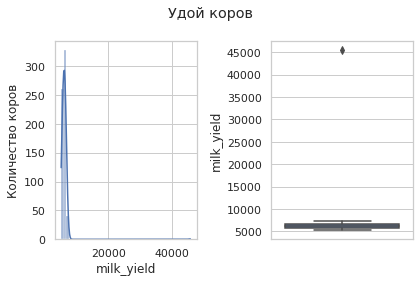

In [43]:
# визуализация признака 'milk_yield'
numeric(ferma_main, 'milk_yield', 'Удой коров')

**Примечание:** На полученных графиках ярко прослеживается один выброс, его значение, которое можно получить из описательной статистики количественных признаков, равно 45 616. Причем по гистограмме видно, что такой объем произвело не стадо коров, а лишь одна. Такое значение можно отнести к аномалии, поэтому для качественной работы далее необходимо удалить строку с этими данными как в таблице 'ferma_main', так и в таблице 'ferma_dad', так как они связаны между собой.

In [44]:
# посмотрим строку со значениями, где 'milk_yield' = 45 616
ferma_main[ferma_main['milk_yield'] == 45616]

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,type_of_pasture,daddys_breed,fat_content,protein,taste_of_milk,age
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


In [45]:
# ограничим значения в столбце 'milk_yield', чтобы избежать выбросов
ferma_main = ferma_main.query('milk_yield <= 7300')
ferma_dad = ferma_dad[ferma_dad['id'] != 17]

In [46]:
# проверим количество строчек в датафреймах после удаления
print('Количество строк в таблице "ferma_main"', ferma_main.shape[0])
print('Количество строк в таблице "ferma_dad"', ferma_dad.shape[0])

Количество строк в таблице "ferma_main" 628
Количество строк в таблице "ferma_dad" 628


<Figure size 1080x720 with 0 Axes>

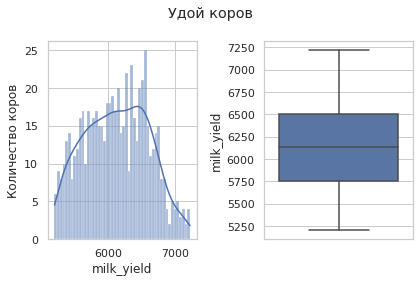

In [47]:
# снова построим визуализация количественного признака 'milk_yield'
numeric(ferma_main, 'milk_yield', 'Удой коров')

<Figure size 1080x720 with 0 Axes>

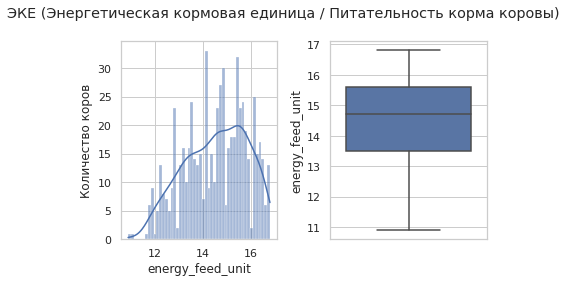

In [48]:
# визуализация признака 'energy_feed_unit'
numeric(ferma_main, 'energy_feed_unit', 'ЭКЕ (Энергетическая кормовая единица / Питательность корма коровы)')

<Figure size 1080x720 with 0 Axes>

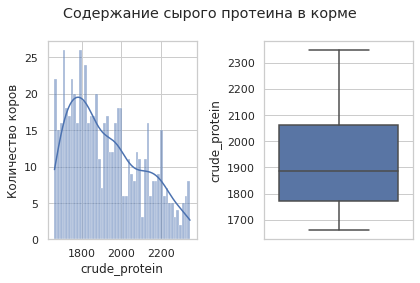

In [49]:
# визуализация признака 'crude_protein'
numeric(ferma_main, 'crude_protein', 'Содержание сырого протеина в корме')

<Figure size 1080x720 with 0 Axes>

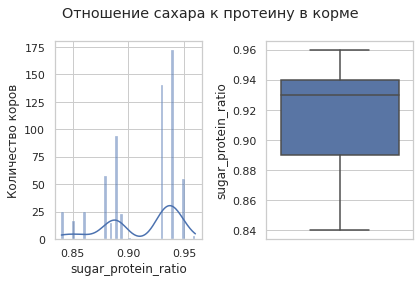

In [50]:
# визуализация признака 'sugar_protein_ratio'
numeric(ferma_main, 'sugar_protein_ratio', 'Отношение сахара к протеину в корме')

<Figure size 1080x720 with 0 Axes>

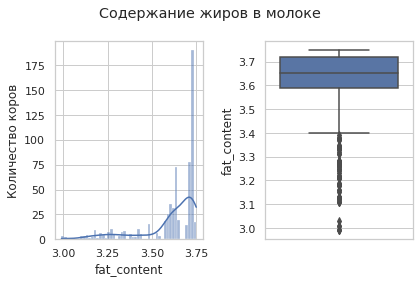

In [51]:
# визуализация признака 'fat_content'
numeric(ferma_main, 'fat_content', 'Содержание жиров в молоке')

<Figure size 1080x720 with 0 Axes>

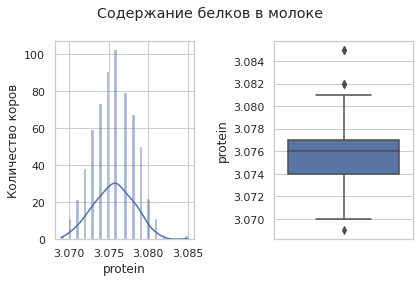

In [52]:
# визуализация признака 'protein'
numeric(ferma_main, 'protein', 'Содержание белков в молоке')

In [53]:
# напишем собственную функцию для визулизации категориальных признаков
def categorical(data, column, title, figsize=(8, 5)):
    # устанавливаем параметры графика
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # создаем график
    ax = sns.countplot(data = data, x=column, palette="viridis")
    
    # добавляем процентное соотношение по признакам
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 0.01 * total,
                f'{height/total:.1%}',
                ha="center")

    # окончательная настройка графика
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Количество коров')
    plt.xticks()
    plt.tight_layout()
    plt.show()

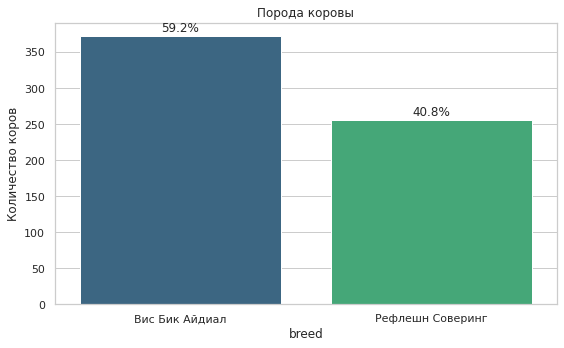

In [54]:
# визуализация признака 'breed'
categorical(ferma_main, 'breed', 'Порода коровы')

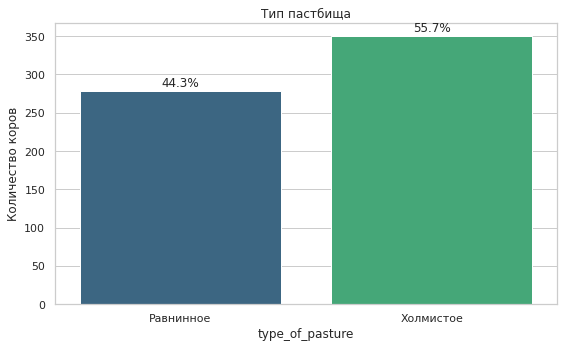

In [55]:
# визуализация признака 'type_of_pasture'
categorical(ferma_main, 'type_of_pasture', 'Тип пастбища')

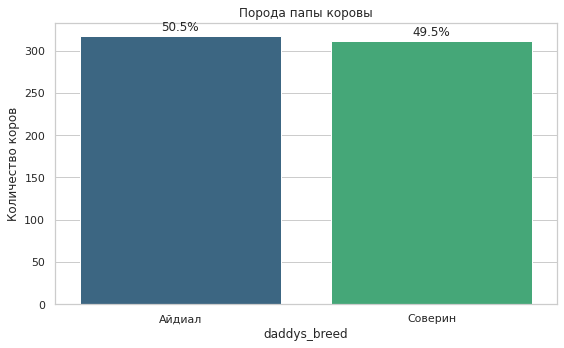

In [56]:
# визуализация признака 'daddys_breed'
categorical(ferma_main, 'daddys_breed', 'Порода папы коровы')

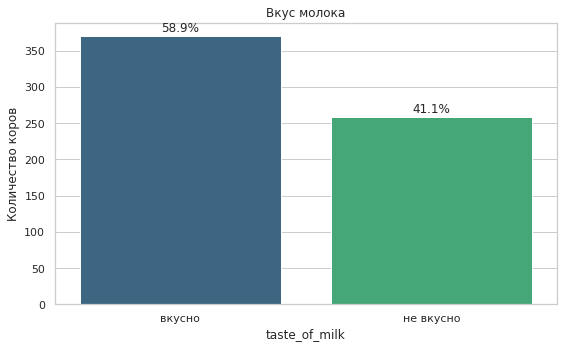

In [57]:
# визуализация признака 'taste_of_milk'
categorical(ferma_main, 'taste_of_milk', 'Вкус молока')

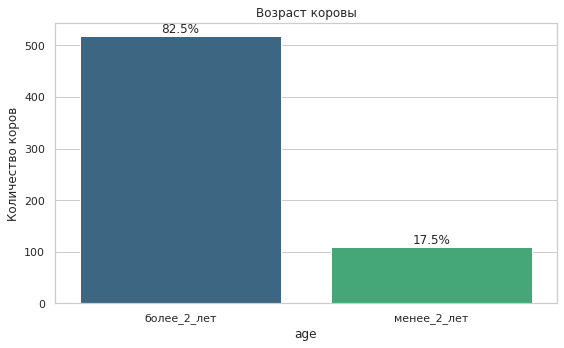

In [58]:
# визуализация признака 'age'
categorical(ferma_main, 'age', 'Возраст коровы')

### 3.2 Исследовательский анализ данных таблицы 'ferma_dad'

**Таблица хранит данные об имени папы каждой коровы фермера в стаде.**

In [59]:
# проведем статистический анализ категориальных признаков в таблице 'ferma_dad'
print('Описательная статистика для категориальных признаков:')
ferma_dad.describe(include=['object'])

Описательная статистика для категориальных признаков:


,dads_name
count,628
unique,4
top,Барин
freq,240


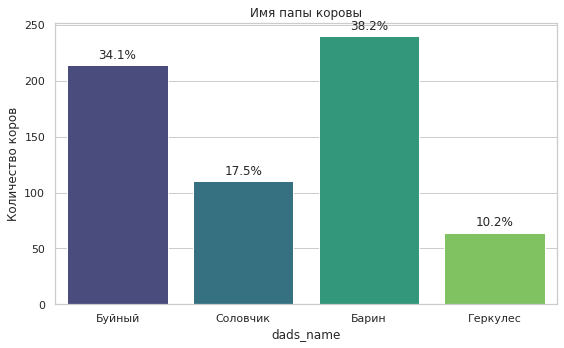

In [60]:
# визуализация признака 'dads_name'
categorical(ferma_dad, 'dads_name', 'Имя папы коровы')

### 3.3 Исследовательский анализ данных таблицы 'cow_buy'

**Таблица хранит данные о коротвах "ЭкоФермы", которые фермер хочет изучить перед покупкой.**

In [61]:
# проведем статистический анализ всех признаков в таблице 'cow_buy'
print('Описательная статистика для количественных признаков:')
cow_buy.describe(include=[np.number])

Описательная статистика для количественных признаков:


,current_fatness,current_protein
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [62]:
print('Описательная статистика для категориальных признаков:')
cow_buy.describe(include=['object'])

Описательная статистика для категориальных признаков:


,breed,type_of_pasture,daddys_breed,dads_name,age
count,20,20,20,20,20
unique,2,2,2,4,2
top,Рефлешн Соверинг,Равнинное,Соверин,Буйный,более_2_лет
freq,11,11,12,8,15


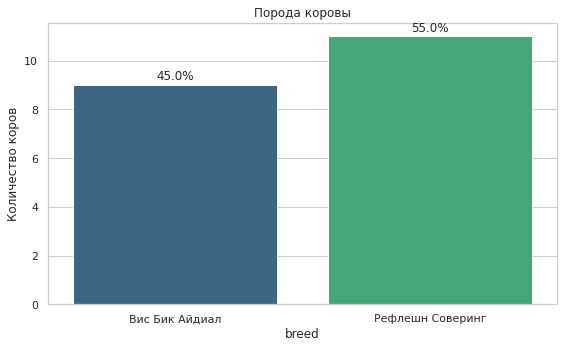

In [63]:
# визуализация признака 'breed'
categorical(cow_buy, 'breed', 'Порода коровы')

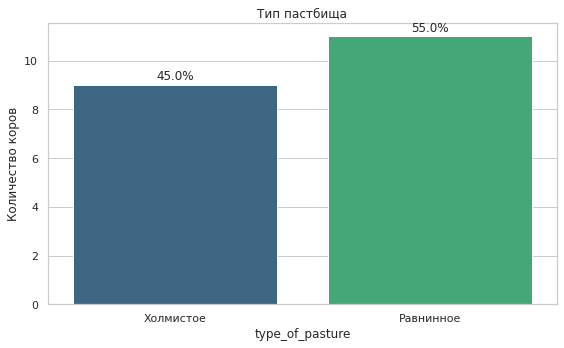

In [64]:
# визуализация признака 'type_of_psture'
categorical(cow_buy, 'type_of_pasture', 'Тип пастбища')

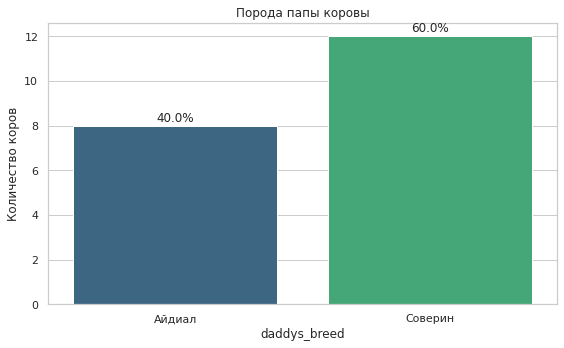

In [65]:
# визуализация признака 'daddys_breed'
categorical(cow_buy, 'daddys_breed', 'Порода папы коровы')

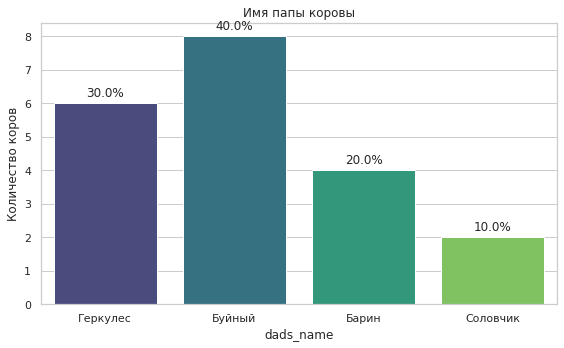

In [66]:
# визуализация признака 'dads_name'
categorical(cow_buy, 'dads_name', 'Имя папы коровы')

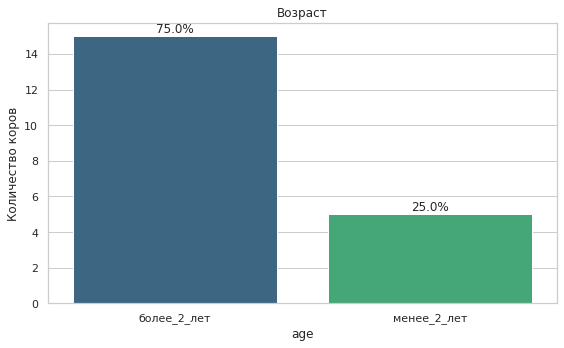

In [67]:
# визуализация признака 'age'
categorical(cow_buy, 'age', 'Возраст')

<Figure size 1080x720 with 0 Axes>

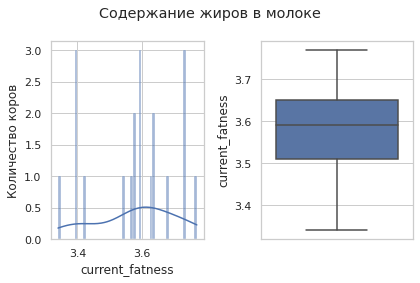

In [68]:
# визуализация признака 'current_fatness'
numeric(cow_buy, 'current_fatness', 'Содержание жиров в молоке')

<Figure size 1080x720 with 0 Axes>

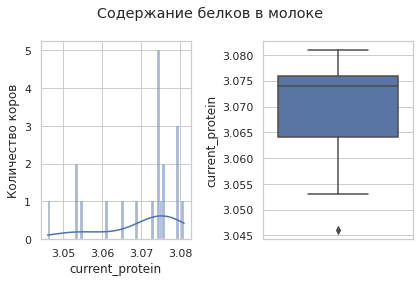

In [69]:
# визуализация признака 'current_protein'
numeric(cow_buy, 'current_protein', 'Содержание белков в молоке')

**Обобщающий вывод этапа "Исследовательский анализ данных":**

**Результаты о стаде фермера на текущий момент ('ferma_main')**:
1. Данные по признаку "Удой, который корова дает в год" в целом распределены нормально, для этого призако также было удалено аномальное значение. Средний удой составляет около 6 189 кг в год.
2. Среднее значение признака "ЭКЕ (Энергетическая кормовая единица)" составляет 14,6. График для признака немного смещен вправо.
3. Среднее значение признака "Содержание сырого протеина в корме" равно 1 923 грамма. График для признака смещен влевло.
4. Среднее значение признака "Отношение сахара к протеину в корме коровы" равно 0,91. График для признака визуально можно разделить на две половины (меньше и больше 0.90).
5. Среднее значение признака "Содержание жиров в молоке" равно 3,60. Наблюдаются выбросы.
6. Среднее значение признака "Содержание белков в молоке" равно 3,07. Данные по признаку распределены нормально.
7. В стаде преобладают коровы породы "Вис Бик Айдиал", которые пасуться на холмистом пастбище.
8. Возраст более 80% коров более двух лет.
9. В больше, чем 50% случаев коровы дают вкусное молоко.
**Данные о коровах для покупки ('cow_buy') в целом схожи с данными о коровах на текущий момент.**

## 4 шаг. Проведение корреляционного анализа признаков в датасете ferma_main.csv

### 4.1 Изучение взаимосвязи между признаками, рассчет коэффициентов корреляции

In [70]:
# отделим количественные признаки в наборе данных 'ferma_main' в отдельную переменную
numeric_col = ['milk_yield', 'energy_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_content', 'protein']

# рассчитаем коэффиценты корреляции для количественных признаков
ferma_main[numeric_col].corr()

,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,fat_content,protein
milk_yield,1.000000,0.765098,0.446731,0.806339,0.600902,0.002966
energy_feed_unit,0.765098,1.000000,0.387875,0.749007,0.637279,-0.008939
crude_protein,0.446731,0.387875,1.000000,0.446332,0.357793,0.226802
sugar_protein_ratio,0.806339,0.749007,0.446332,1.000000,0.629098,0.073718
fat_content,0.600902,0.637279,0.357793,0.629098,1.000000,-0.026542
protein,0.002966,-0.008939,0.226802,0.073718,-0.026542,1.000000


<AxesSubplot:>

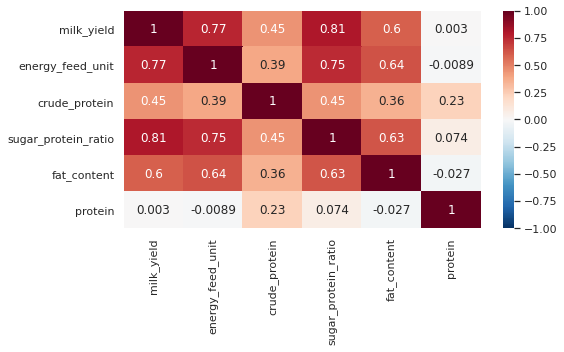

In [71]:
# нарисуем тепловую карту для визуализации результатов полученных коэффициентов корреляции
plt.figure(figsize=(8,4))
sns.heatmap(
    ferma_main[numeric_col].corr(),        
    cmap='RdBu_r',
    annot=True, 
    vmin=-1, vmax=1)

### 4.2 Построение диаграмм рессеяния

In [72]:
# напишем собственную функцию для построения диаграммы рассеивания
def scatterplot(data, categorical_col, target_col='milk_yield', cols_to_drop=['id']):

    # выбираем только количественные признаки
    numeric_cols = data.select_dtypes(include=['number']).columns
    numeric_cols = numeric_cols.drop([target_col] + cols_to_drop)
    
    # устанавливаем параметры графика
    sns.set(style="whitegrid")
    plt.figure(figsize=(15, 10)) 
    
    # посчитаем количество строк для сетки графика
    rows = (len(numeric_cols) + 1) // 2  
    fig, axes = plt.subplots(rows, 2, figsize=(12, rows*4))
    
    # убираем лишнее пустое поле, т.к. количественных признаков всего 5, а сетка строится 3х2 (визуальное оформление)
    for ax in axes.flat[len(numeric_cols):]:
        ax.set_visible(False)

    # напишем цикл для построения графиков в сетке
    for ax, feature in zip(axes.flat, numeric_cols):
        sns.scatterplot(data=data, x=feature, y=target_col, hue=categorical_col,
                   palette='viridis', alpha=0.5, ax=ax)
        ax.set_title(f'"Удой коров" и признак {feature} по {categorical_col}')
        ax.set_xlabel(feature)
        ax.set_ylabel(target_col)
        ax.legend(loc='upper left')
    # окончательная настройка графика
    plt.tight_layout()
    plt.show()  

<Figure size 1080x720 with 0 Axes>

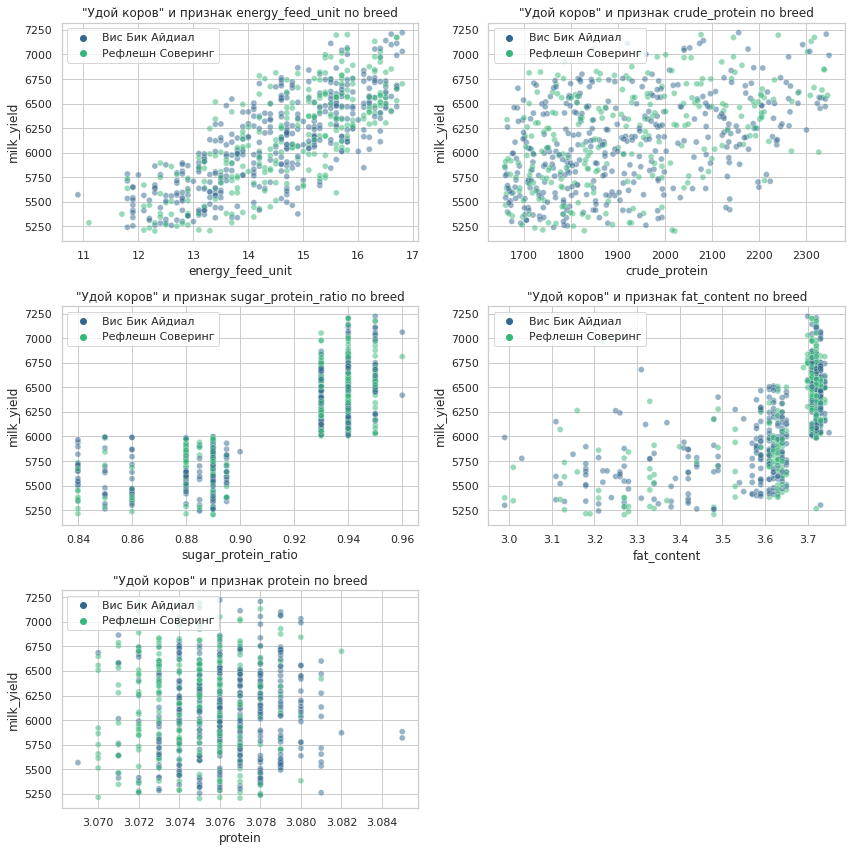

In [73]:
scatterplot(ferma_main, categorical_col='breed')

<Figure size 1080x720 with 0 Axes>

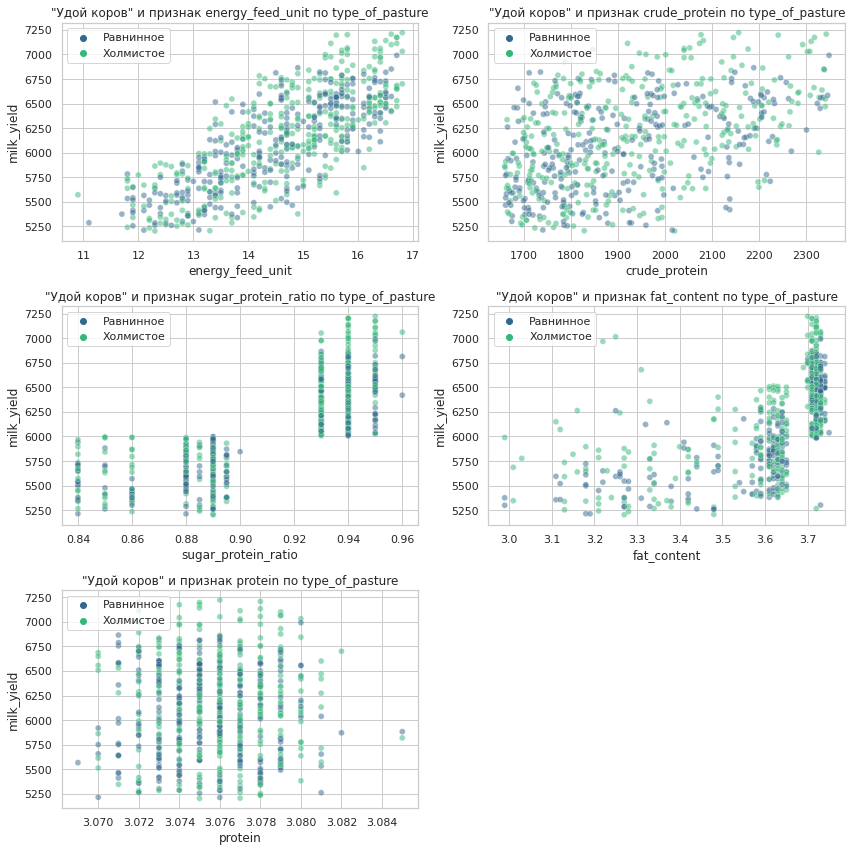

In [74]:
scatterplot(ferma_main, categorical_col='type_of_pasture')

<Figure size 1080x720 with 0 Axes>

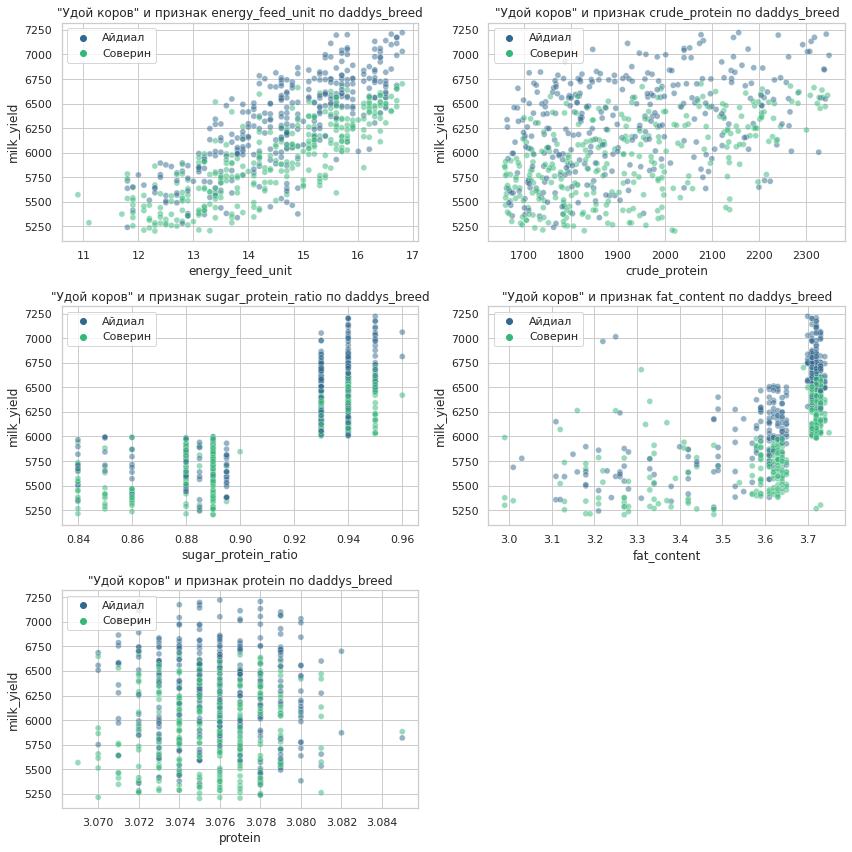

In [75]:
scatterplot(ferma_main, categorical_col='daddys_breed')

<Figure size 1080x720 with 0 Axes>

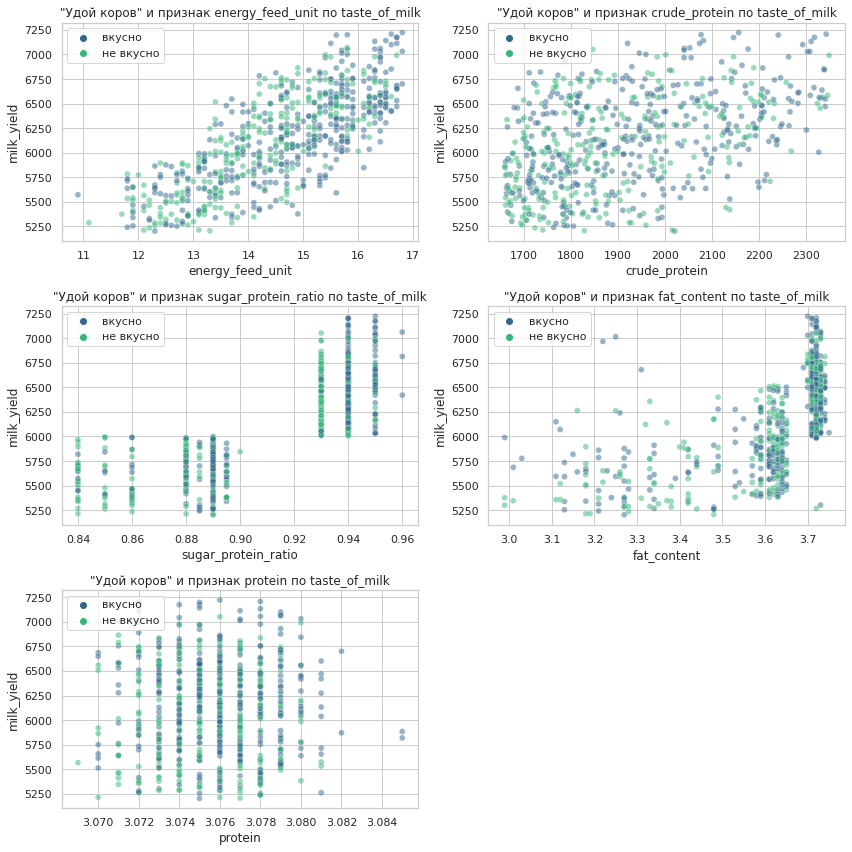

In [76]:
scatterplot(ferma_main, categorical_col='taste_of_milk')

<Figure size 1080x720 with 0 Axes>

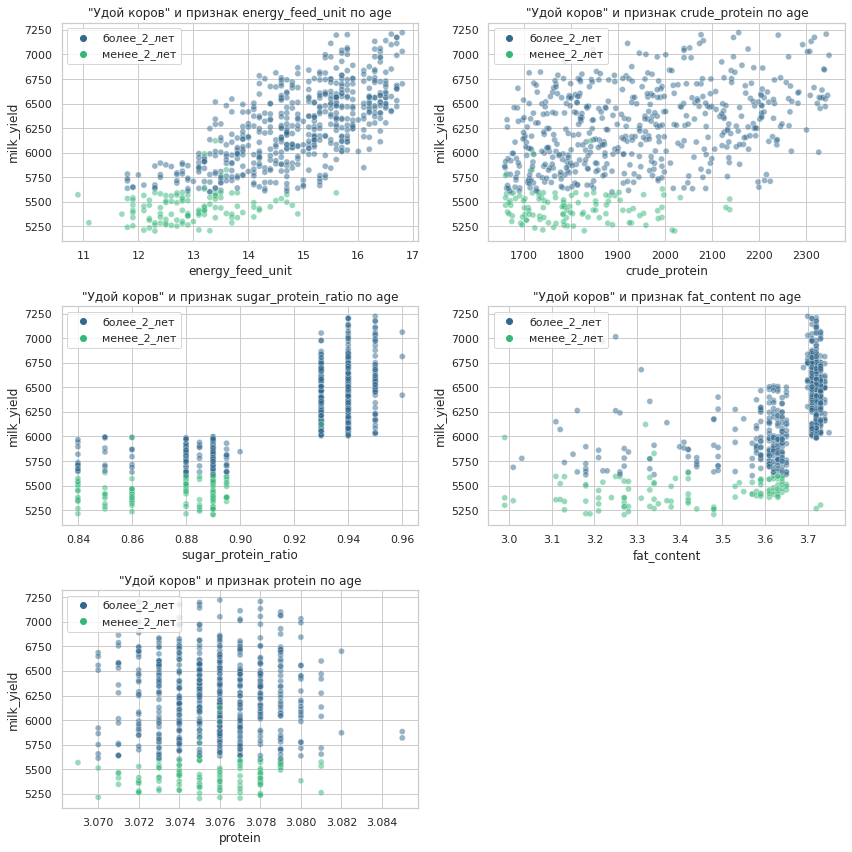

In [77]:
scatterplot(ferma_main, categorical_col='age')

**Обобщающий вывод этапа "Проведение корреляционного анализа признаков в датасете ferma_main.csv":**

**Типы взаимосвязи между целевым и входными признаками:**
1. Связь между признаками "Удой коровы" и "ЭКЕ (Энергетическая кормовая единица)" линейная и сильная, это подтвержает полученные коэффициент корреляции равный 0,77.
2. Связь между признаками "Удой коровы" и "Сырой протеин" линейная, но умеренная, так как коэффициент корреляции равен 0,45.
3. Признаки "Удой коровы" и "СПО (Сахаро-протеиновое соотношение)" не имеют линейной связи, признак СПО более похож на категориальный, так как данные распределены по определенным значениям.
4. Коэффициент корреляции между признаками "Удой коров" и "Содержание жиров в молоке" достаточно высокий (0,6), также стоит отметить, что коровы дают в основном молоко с высоким процентом жирности.
5. Между признаками "Удой коров" и "Содержание белков в молоке" связь отсутствует.

**Между целевым признаком и некоторыми входными признаки присутствует нельнейная связь**, а именно:

**Целевой признак:** "Удой коровы"

**Входные признаки:** "СПО (Сахаро-протеиновое соотношение)", "Содержание жиров в молоке" и "Содержание белков в молоке".

**Мультиколлинеарность между входными признаками не наблюдается.**

## 5 шаг. Обучение модели линейной регрессии (Задача регрессии)

### 5.1 Первая модель линейной регрессии

**Целевой признак:** - 'milk_yield' (Удой коров, кг).

**Признаки, которые будут взяты для модели линейной регрессии:**

**Количественные признаки:**
1. 'energy_feed_unit': ЭКЕ (энергетическая кормовая единица) - показатель питательности корма коровы, от нее напрямую зависит насыщаемость коровы, что приводит к получению определенного количества молока.
2. 'crude_protein': Сырой протеин - содержание сырого протеина в корме влиет на его питательность для коровы, поэтому можно взять этот признак для построение модели.
3. 'sugar_protein_ratio': СПО (Сахаро-протеиновое отношение) - отношение сахара к протеину в корме коровы. Данный признак не имеет линейной связи с признаком "Удой коровы, кг", но может влиять на показатель питательности корма, поэтому будет взят в модель.

**Категориальные признаки:**
1. 'breed': От породы коровы может зависить, какой объем молока она дает.
2. 'type_of_pasture': От типа пастбища, на котором паслась корова, также может зависить состояние самой коровы, которые влияет на количество получаемого молока.
3. 'daddys_breed': От породы папы коровы может зависить состояние самой коровы, какие у нее особенности и способности, что также влияет на производительность самой коровы.
4. 'age': От возраста коровы зависит ее состояние производить определенный объем молока.

In [78]:
# напишем собственную функцию для обучения модели линейной регрессии
def model_lr(data, cat_col_names, num_col_names):
    # копируем датасет в новую переменную, чтобы при работе не изменить исходные данные
    df = data.copy()
    
    RANDOM_STATE = 42

    X = df.drop('milk_yield', axis=1)
    y = df['milk_yield']
    
    # разбиваем данные на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)

    # проводим кодирование категориальных признаков
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    encoder_col_names = encoder.get_feature_names()
    
    # проводим масштабирование количественных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    # перепишем данные в переменные с закодированными и мащтабированными признаками
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # соединеяем обработанные данные в единые тренировочные и тестовые выборки
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # проводим обучение модели и получение предсказаний на тестовых данных
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

    # оценим качество моделей с помощью метрик
    metrics = {
    'R2': r2_score(y_test, predictions),
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'RMSE': mean_squared_error(y_test, predictions, squared=False) 
    }
    
    # проведем анализ остатков
    # рассчитаем остатки
    residuals = y_test - predictions

    # построим графики по количественным признакам — гистограмму частотности распределения и диаграмму рассеяния
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    axes[0].hist(residuals, bins=50)
    axes[0].set_title('Гистограмма распределения остатков')
    axes[0].set_xlabel('Остатки')

    axes[1].scatter(predictions, residuals)
    axes[1].set_xlabel('Предсказания модели')
    axes[1].set_ylabel('Остатки')
    axes[1].set_title('Анализ дисперсии')
    plt.show()
    
    return {
        'Модель': model_lr,
        'Рассчитанные для модели метрики': metrics,
    }

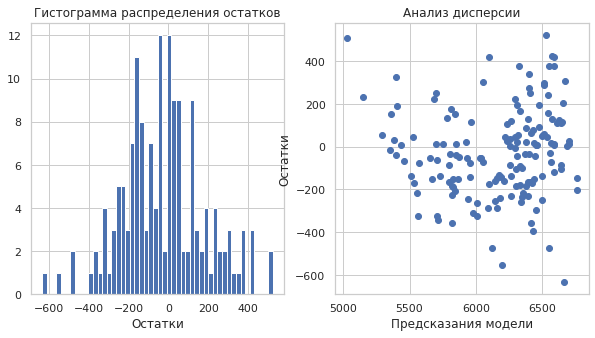

{'Модель': LinearRegression(),
 'Рассчитанные для модели метрики': {'R2': 0.7844078173416967,
  'MAE': 164.24194463474925,
  'MSE': 43887.015009660514,
  'RMSE': 209.4922791170608}}

In [79]:
cat_col_names_1 = ['breed', 'type_of_pasture', 'daddys_breed', 'age']
num_col_names_1 = ['energy_feed_unit', 'crude_protein', 'sugar_protein_ratio']
model_lr(ferma_main, cat_col_names_1, num_col_names_1)

**Выводы по первой модели:**
1. R2 (коэффициент детерминации) = 0,78, показывает, что модель линейной регрессии хорошо предсказывает данные в 78%.
2. Гистограма распределения остатков показывает нормальное распределение, однако, график имеет небольшое смещение влево, что говорит о том, что модель часто дает слишком большие предсказания, ее прогнозы выше истинных значений.
3. Также видно, что разница между минимумом и максимумом остатков при различных прогнозных значениях модели меняется. Дисперсия между значениями на оси Y непостоянна на протяжении всей оси X. Это говорит о том, что модель ошибается, и, скорее всего переоценивает или недооценивает предсказания значений целевого признака.

### 5.2 Вторая модель линейной регрессии

**На 4 шаге проекта** были построены диаграммы рассеивания, по которым стало видно, что **СПО (сахаро-протеиновое отношение)** не имеет линейной связи с целевым признаком и больше похож на категориальный признак, так как его значения делятся на две категории по левую и правую сторону от значения 0,91.

Поэтому для **устранения нелинейности** необходимо преобразовать "СПО" в бинарный категориальный признак, используя границу 0,91.

In [80]:
# преобразуем признак СПО в бинарный категориальный признак
ferma_main['spr'] = ferma_main['sugar_protein_ratio'].apply(lambda x: 'более_0.91' if x > 0.91 else 'менее_0.91')

**На 4 шаге проекта** по диаграмме рассеивания также видно, что признак **ЭКЕ (энергетическая кормовая единица)** также нелинейно связана с целевым признаком "Удой коров, кг". Чтобы устранить нелинейность, можно возвести признак ЭКЕ в квадрат.

In [81]:
# возведем значения признакак ЭКЕ в квадрат
ferma_main['square_energy_feed_unit'] = ferma_main['energy_feed_unit'] ** 2

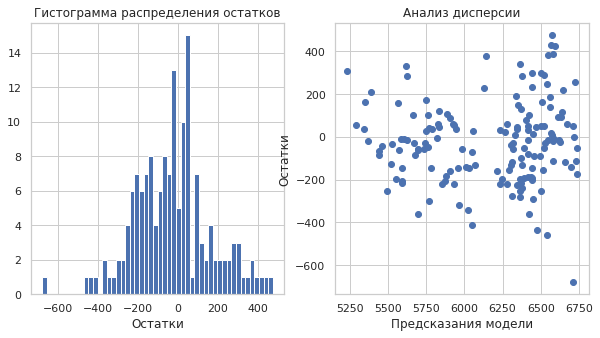

{'Модель': LinearRegression(),
 'Рассчитанные для модели метрики': {'R2': 0.8180879926867501,
  'MAE': 149.03965222364604,
  'MSE': 37030.91131113695,
  'RMSE': 192.43417396901452}}

In [82]:
cat_col_names_2 = ['breed', 'type_of_pasture', 'daddys_breed', 'age', 'spr']
num_col_names_2 = ['square_energy_feed_unit', 'crude_protein']
model_lr(ferma_main, cat_col_names_2, num_col_names_2)

**Выводы по второй модели:**
1. R2 (коэффициент детерминации) = 0,81, показывает, что модель линейной регрессии хорошо предсказывает данные в 81%, а значит, ошибается только в 19% случаев.
2. Гистограма распределения остатков показывает нормальное распределение, однако, график имеет небольшое смещение вправо, это значит, что прогнозы модели меньше фактических значений целевого признака.
3. Также видно, что разница между минимумом и максимумом остатков при различных прогнозных значениях модели меняется. Дисперсия между значениями на оси Y непостоянна на протяжении всей оси X. Это говорит о том, что модель ошибается, и, скорее всего переоценивает или недооценивает предсказания значений целевого признака. Дисперсия остатков увеличивается на больших значениях.

### 5.3 Третья модель линейной регрессии

In [83]:
# добавим признак 'dads_name' к изучаемому датафрему
ferma_main = ferma_main.merge(ferma_dad, on='id')

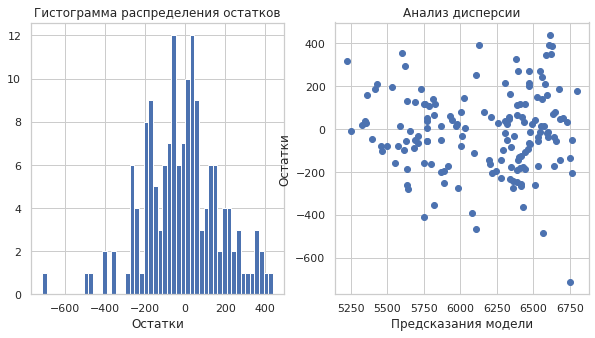

{'Модель': LinearRegression(),
 'Рассчитанные для модели метрики': {'R2': 0.8247542745210408,
  'MAE': 146.16302445362308,
  'MSE': 35673.88988618191,
  'RMSE': 188.8753289505591}}

In [84]:
cat_col_names_3 = ['breed', 'type_of_pasture', 'daddys_breed', 'age', 'spr', 'dads_name']
num_col_names_3 = ['square_energy_feed_unit', 'crude_protein']
model_lr(ferma_main, cat_col_names_3, num_col_names_3)

**Выводы по третьей модели:**
1. R2 (коэффициент детерминации) = 0,82, показывает, что модель линейной регрессии хорошо предсказывает данные в 82%, а значит, ошибается только в 18% случаев. Коэффициент детерминации у третье модели выше двух предыдущих моделей.
2. Гистограма распределения остатков показывает нормальное распределение, однако, график все равно имеет небольшое смещение влево.
3. Также видно, что разница между минимумом и максимумом остатков при различных прогнозных значениях модели меняется. Дисперсия между значениями на оси Y непостоянна на протяжении всей оси X. Это говорит о том, что модель ошибается, и, скорее всего переоценивает или недооценивает предсказания значений целевого признака. Дисперсия остатков увеличивается на больших значениях.
4. Анализ метрик MAE, MSE, RMSE показывают минимальные значения для третьей модели.

**Все данные выводы позволяют сказать, что третья модель является наиболее точной для предсказаний.**

In [95]:
# напишем собственную функцию для возвращения необходимых показателей для третьей модели
def model_lr_3(data, cat_col_names, num_col_names):
    # копируем датасет в новую переменную, чтобы при работе не изменить исходные данные
    df = data.copy()
    
    RANDOM_STATE = 42

    X = df.drop('milk_yield', axis=1)
    y = df['milk_yield']
    
    # разбиваем данные на тренировочную и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        random_state=RANDOM_STATE)

    # проводим кодирование категориальных признаков
    encoder = OneHotEncoder(drop='first', sparse=False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    encoder_col_names = encoder.get_feature_names()
    
    # проводим масштабирование количественных признаков
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    # перепишем данные в переменные с закодированными и мащтабированными признаками
    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    # соединеяем обработанные данные в единые тренировочные и тестовые выборки
    X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

    # проводим обучение модели и получение предсказаний на тестовых данных
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)
    
    return model_lr, predictions, y_test, encoder, scaler

In [96]:
# вытащим предсказания для третьей (лучшей) модели
model_lr_3, predictions_3, y_test_3, encoder_3, scaler_3 = model_lr_3(ferma_main, cat_col_names_3, num_col_names_3)

# рассчитаем доверительный интервал прогноза для лучшей модели
interval = stats.norm.interval(confidence= 0.95 , loc=np.mean(predictions_3), scale=stats.sem(predictions_3))
print(f'Доверительный интервал модели: {interval[0].round(2)} - {interval[1].round(2)}')

Доверительный интервал модели: 6092.34 - 6221.38


### 5.4 Прогноз удоя коров на основе лучшей модели ('cow_buy')

In [87]:
# добавление ЭКЕ (Энергетической кормовой единицы), увеличенной на 5%
cow_buy['square_energy_feed_unit'] = (((ferma_main['energy_feed_unit'].mean() * 1.05))**2).round(2)

# добавление Сырого протеина, увеличенного на 5%
cow_buy['crude_protein'] = (ferma_main['crude_protein'].mean() * 1.05).round(2)

# добавление СПО (сахаро-протеиновое отношение), увеличенного на 5%
cow_buy['sugar_protein_ratio'] = ferma_main['sugar_protein_ratio'].mean() * 1.05

# приведение признака СПО к категориальному виду
cow_buy['spr'] = cow_buy['sugar_protein_ratio'].apply(lambda x: 'более_0.91' if x > 0.91 else 'менее_0.91')

In [97]:
# спрогнозируем удой коров, которых хочет купить фермер

# выполним подготовку данных, аналогичную той, что делали выше, но на основе лучшей модели
# кодируем категориальные признаки с помощью 'encoder_3' третьей (лучшей) модели
cow_buy_ohe = encoder_3.transform(cow_buy[cat_col_names_3])
encoder_col_names = encoder_3.get_feature_names()
# перепишем данные с закодированными признаками в переменную
cow_buy_ohe = pd.DataFrame(cow_buy_ohe, columns=encoder_col_names)

# масштабируем количественные признаки с помощью 'scaler_3' третье (лучшей) модели
cow_buy_scaled = scaler_3.transform(cow_buy[num_col_names_3])
# перепишем данные с масштабированными признаками в переменную
cow_buy_scaled = pd.DataFrame(cow_buy_scaled, columns=num_col_names_3)

# соединяем обработанные данные в единую переменную
cow_buy_final = pd.concat([cow_buy_ohe, cow_buy_scaled], axis=1)

# получаем предсказания с помощью третьей (лучшей) модели
cow_buy_predictions = model_lr_3.predict(cow_buy_final).round(4) # ставим округления для вывода предсказаний без появления ошибок

In [98]:
# запишем предсказания в исходный датафрейм 'cow_buy'
cow_buy['milk_yield'] = final_predictions 

In [99]:
# отберем данные по тем коровам, чей удой (кг) в год соответствует диапазону найденного доверительного интервала
cow_buy[cow_buy['milk_yield'] > 6000]

,breed,type_of_pasture,daddys_breed,dads_name,current_fatness,current_protein,age,square_energy_feed_unit,crude_protein,sugar_protein_ratio,spr,milk_yield
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.36,2019.95,0.958744,более_0.91,6609.9151
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.36,2019.95,0.958744,более_0.91,6378.7068
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.36,2019.95,0.958744,более_0.91,6283.9956
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.36,2019.95,0.958744,более_0.91,6593.0852
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.36,2019.95,0.958744,более_0.91,6542.1418
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.36,2019.95,0.958744,более_0.91,6425.3760
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.36,2019.95,0.958744,более_0.91,6609.9151
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.36,2019.95,0.958744,более_0.91,6571.2555
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.36,2019.95,0.958744,более_0.91,6283.9956
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.36,2019.95,0.958744,более_0.91,6400.5364


**Обощающий вывод этапа "Обучение модели линейной регрессии (Задача регрессии)":**
1. Для датафрейма 'ferma_main' (целевой признак: 'milk_yield') было построено три модели линейной регрессии.
- Для построения модели линейной регрессии категориальные признаки кодировались;
- Для построения модели линейной регрессии количественные признаки масштабировались;
- Для улучшения качества модели признак "СПО" был привед к бинарному-категориальному, а значения признака "ЭКЕ" были возведены в квадрат.
- Для каждой из трех моделей были рассчитаны метрики качествва, а также проведены анализы остатков.
2. Лучшей моделью по всем проанализированным показателям оказалась модель №3, ее R2 = 0,82. Он показывает, что модель линейной регрессии хорошо предсказывает данные в 82%, а значит, ошибается только в 18% случаев.
3. С помощью третьей модели были спрогнозированы значения удоя коров, которых фермер хочет купить (датафрейм 'cow_buy').

## 6 шаг. Обучение модели логистической регрессии (Задача классификации)

### 6.1 Построение модели логистической регрессии

В качестве целевого признака будет использоваться **"Вкус молока" ('taste_of_milk')**, поэтому его необходимо привести к количественному типу признака.

**Характеристика признака:** 1 - вкусно, 0 - невкусно.

In [101]:
# преобразование признака "Вкус молока" к количественному типу признака
ferma_main['taste_of_milk'] = ferma_main['taste_of_milk'].apply(lambda x: 1 if x == 'вкусно' else 0)

# посмотрим признак "Вкус молока" после преобразования
ferma_main.head(10)

,id,milk_yield,energy_feed_unit,crude_protein,sugar_protein_ratio,breed,type_of_pasture,daddys_breed,fat_content,protein,taste_of_milk,age,spr,square_energy_feed_unit,dads_name
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,1,более_2_лет,менее_0.91,201.64,Буйный
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,1,менее_2_лет,менее_0.91,163.84,Соловчик
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,0,более_2_лет,менее_0.91,196.00,Барин
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,0,более_2_лет,менее_0.91,153.76,Буйный
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,1,менее_2_лет,менее_0.91,163.84,Барин
5,6,5254,12.7,1806,0.885,Рефлешн Соверинг,Холмистое,Соверин,3.13,3.078,1,менее_2_лет,менее_0.91,161.29,Барин
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,1,более_2_лет,менее_0.91,174.24,Соловчик
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,1,более_2_лет,более_0.91,216.09,Геркулес
8,9,6783,14.2,1918,0.940,Рефлешн Соверинг,Холмистое,Айдиал,3.71,3.077,1,более_2_лет,более_0.91,201.64,Буйный
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,1,менее_2_лет,менее_0.91,179.56,Барин


**Признаки, которые будут взяты для модели логистической регрессии:**

**Количественные признаки:**
1. 'square_energy_feed_unit': ЭКЕ (энергетическая кормовая единица) - показатель питательности корма коровы, от нее напрямую зависит насыщаемость коровы, что приводит к получению определенного количества молока, а также его вкуса.
2. 'crude_protein': Сырой протеин - содержание сырого протеина в корме влиет на его питательность для коровы, от чего зависит вкус молока, которое она дает.
3. 'fat_content': Жирность, % - содержание жиров в молоке, которые сильно могут влиять на вкус молока.
4. 'protein': Белок, % - содержание белков в молоке, которые сильно могут влиять на вкус молока.
5. 'milk_yield': Удой, кг - масса молока, которое корова дает в год, этот признак может влияет на способность короыв производить молоко определенного вкуса и в целом.

**Категориальные признаки:**
1. 'breed': От породы коровы может зависить вкус молока, которое она дает.
2. 'type_of_pasture': От типа пастбища, на котором паслась корова, также может зависить состояние самой коровы, которые влияет на вкус молока, которое она дает.
3. 'daddys_breed': От породы папы коровы может зависить состояние самой коровы, какие у нее особенности и способности, какое молоко по вкусу она дает.
4. 'age': От возраста коровы зависит ее состояние производить определенный объем молока, а также вкус самого молока.
5. 'spr': СПО (Сахаро-протеиновое отношение) - отношение сахара к протеину в корме коровы. Данный признак не имеет линейной связи с признаком "Удой коровы, кг", но может влиять на показатель питательности корма, поэтому будет взят в модель.

{'Accuracy': 0.6305732484076433, 'Recall': 0.8636363636363636, 'Precision': 0.6229508196721312}


Text(0.5, 12.5, 'Predicted')

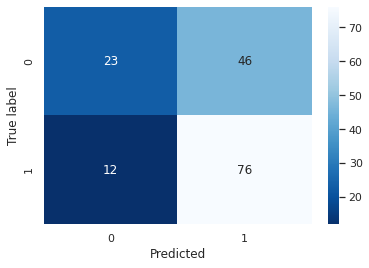

In [112]:
# копируем датасет в новую переменную, чтобы при работе не изменить исходные данные
ferma_main = ferma_main.copy()
    
RANDOM_STATE = 42

X = ferma_main.drop('taste_of_milk', axis=1)
y = ferma_main['taste_of_milk']
    
# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE)

cat_col_names = ['breed', 'type_of_pasture', 'daddys_breed', 'age', 'spr']
num_col_names = ['square_energy_feed_unit', 'crude_protein', 'fat_content', 'protein', 'milk_yield']

# проводим кодирование категориальных признаков
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()
    
# проводим масштабирование количественных признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

# перепишем данные в переменные с закодированными и мащтабированными признаками
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

# соединеяем обработанные данные в единые тренировочные и тестовые выборки
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# проводим обучение модели и получение предсказаний на тестовых данных
clf = LogisticRegression()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# оценим качество моделей с помощью метрик
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    }
print(metrics)

# построим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

**Анализ полученной логистической регрессии:**

**Главное для закзчика - вкусное молоко.**
1. Модель в 46 случаях показывает "Ошибку 1-го рода", это значит, что ошибочно предсказывает факт того, что молоко вкусное.
2. Модель в 12 случаях показывает "Ошибку 2-го рода", это значит, что ошибочно предсказывает факт того, что молоко невкусное.

Так как для заказчика в первую очередь важен **вкус молока**, то необходимо минимизировать "Ошибку 1-го рода", чтобы не получилось ситуации, что молоко было предсказано вкусным, а по факту оказалось невкусным и разочаровало фермера или покупателя молока.

3. Метрика "Recall" (полнота), показывает, смогла ли модель классификации присвоить класс 1 всем объектам этого класса. Она показывает ошибки 2-го рода, но чем выше метрика, тем больше правильных прогнозов ('Positive') смогла сделать модель. По нашим результатам "Recall" = 0,86.
4. Метрика "Precision" (точность) показывает точность, с которой модель присваивает объектам класс 1, то есть получает результат типа Positive. Иными словами, precision определяет, не слишком ли часто модель выставляет класс 1 объектам класса 0. Чем выше эта метрика, тем меньше таких случаев, а у по результатам "Precision" = 0,62.

**Необходимо минимизировать "Ошибку 1-го рода".**

### 6.2 Снижение критической ошибки

In [113]:
# выведем объекты по убыванию вероятности их принадлежности к классу 
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

     y_valid   y_proba
85         1  0.838016
110        1  0.837481
51         1  0.835695
66         1  0.835253
146        1  0.823356


In [123]:
# разобьем промежуток на 1000 мелких для подбора подходящего порога принадлежности к классам
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 100,endpoint=False)]
print(thresholds) 

[0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.96, 0.97, 0.98, 0.99]


In [124]:
# посмотрим результаты работы модели при разных пороговых значения
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

data.sample(5)

,y_valid,y_proba,y_pred_0.1,y_pred_0.11,y_pred_0.12,y_pred_0.13,y_pred_0.14,y_pred_0.15,y_pred_0.16,y_pred_0.17,...,y_pred_0.91,y_pred_0.92,y_pred_0.93,y_pred_0.94,y_pred_0.95,y_pred_0.96,y_pred_0.97,y_pred_0.98,y_pred_0.99,y_pred_1.0
69,1,0.786082,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
146,1,0.823356,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
41,0,0.593939,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
128,1,0.626326,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
143,0,0.476244,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# рассчитаем оптимальный порог
for i in thresholds:
    y_pred = data[f'y_pred_{threshold}']
    precision = round(precision_score(y_test, y_pred), 2)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    if fp == 0:
        print(f'Порог = {threshold}')
        porog = threshold
        break

Порог = 0.84


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
# заново рассчитаем метрики качества модели для найденного порога
metrics = {
    'Accuracy': accuracy_score(y_test, data['y_pred_'+str(porog)]).round(2),
    'Recall': recall_score(y_test, data['y_pred_'+str(porog)]).round(2),
    'Precision': precision_score(y_test, data['y_pred_'+str(porog)]).round(2),
    }
print(metrics)

{'Accuracy': 0.44, 'Recall': 0.0, 'Precision': 0.0}


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 12.5, 'Predicted')

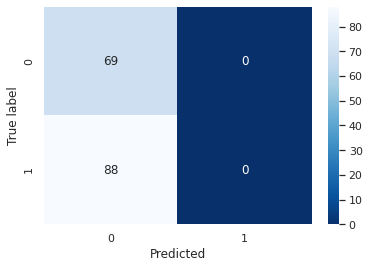

In [135]:
# заново построим матрицу ошибок для найденного порога
cm = confusion_matrix(y_test, data['y_pred_'+str(porog)])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

**Вывод по минимизации "Ошибки 1-го рода":** При пороге = 0,84 модель логистической регрессии полностью исключает появление "Ошибки 1-го рода".

### 6.3 Прогноз вкуса молока коров, которых хочет купить фермер ('cow_buy')

In [146]:
# создадим столбец с признаком 'taste_of_milk'
cow_buy['taste_of_milk'] = cow_buy.get('taste_of_milk', 0)

In [147]:
# напишем признаки для датафрейма 'cow_buy', т.к. "Жирность, %" и "Белок, %" называются иначе
cat_col_names_4 = ['breed', 'type_of_pasture', 'daddys_breed', 'age', 'spr']
num_col_names_4 = ['square_energy_feed_unit', 'crude_protein', 'current_fatness', 'current_protein', 'milk_yield']

# спрогнозируем вкус молока коров, которых хочет купить фермер

# выполним подготовку данных, налогисную той, что делали выше
# кодируем категориальные признаки
cow_buy_ohe_milk = encoder.transform(cow_buy[cat_col_names_4])
encoder_col_names_milk = encoder.get_feature_names()
# переписываем данные с закодированными признаками в переменную
cow_buy_ohe_milk = pd.DataFrame(cow_buy_ohe_milk, columns=encoder_col_names_milk)

# масштабируем количественные признаки
cow_buy_scaled_milk = scaler.transform(cow_buy[num_col_names_4])
# переписываем данные с масштабированными признаками в переменную
cow_buy_scaled_milk = pd.DataFrame(cow_buy_scaled_milk, columns=num_col_names_4)

# соединяем обработанные данные в единую переменную
cow_buy_milk_final = pd.concat([cow_buy_ohe_milk, cow_buy_scaled_milk], axis=1)

# получаем предсказания с помощью модели логистической регрессии
cow_buy_milk_predictions = clf.predict_proba(cow_buy_milk_final)[:,1]

In [148]:
# отберем данные по "вкусу молока", которые соответствуют классификации по полученному пороговому значения (0,84)
cow_buy['taste_of_milk'] = (cow_buy_milk_predictions >= 0.84).astype(int)

# выведем полученный прогноз
cow_buy

,breed,type_of_pasture,daddys_breed,dads_name,current_fatness,current_protein,age,square_energy_feed_unit,crude_protein,sugar_protein_ratio,spr,milk_yield,taste_of_milk
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.36,2019.95,0.958744,более_0.91,6609.9151,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.36,2019.95,0.958744,более_0.91,6378.7068,0
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.36,2019.95,0.958744,более_0.91,6283.9956,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.36,2019.95,0.958744,более_0.91,6593.0852,0
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.36,2019.95,0.958744,более_0.91,6542.1418,0
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.36,2019.95,0.958744,более_0.91,6425.3760,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.36,2019.95,0.958744,более_0.91,6609.9151,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.36,2019.95,0.958744,более_0.91,6571.2555,0
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.36,2019.95,0.958744,более_0.91,6283.9956,0
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.36,2019.95,0.958744,более_0.91,6400.5364,0


**Обощающий вывод этапа "Обучение модели логистической регрессии (Задача классификации)":**
1. На основе датафрейма 'ferma_main' была обучена модель логистической регрессии.
2. Был получен порог классификации = 0,84, при котором модель вовсе не будет допускать "Ошибку 1-го рода".
3. По полученному прогнозу получилось, что коровы, которых хочет купить фермер ('cow_buy') всегда дают невкусное молоко.

## Итоговые выводы

В ходе работы были проанализированы данные, предоставленные фермером, владельцем молочного хозяйства "Вольный луг", который хочет купить буренок пастбищ "ЭкоФерма", чтобы расширить поголовье стада коров.

Было реализовано 6 этапов работы.

**1 этап: Загрузка и изучение данных.** Во время проведения этого этапа было пронализирована три файла с данными ('ferma_main', 'ferma_dad', 'cow_buy'):
1. Все файлы с данными соответствуют описанию задачи.
2. В файлах отсутствуют пропущенные значения.
3. Некоторые названия столбцов имеют неприемлемый стиль.
4. В некоторых столбцах указан некоректный тип данных.

**2 этап: Предобработка данных.** На этом этапе было сделано:
1. В таблицах названия столбцов были приведены к общему стилю.
2. В таблице 'ferma_main' удалены явные дубликаты.
3. В таблицах 'ferma_main' и 'cow_buy' обработаны все неявные дубликаты.
4. В таблицах 'ferma_main' и 'cow_buy' все столбцы приведены к корректному типу данных.

**3 этап: Исследовательский анализ данных.** На этом этапе было выявлено, что:

**Результаты о стаде фермера на текущий момент ('ferma_main')**:
1. Данные по признаку "Удой, который корова дает в год" в целом распределены нормально, для этого призако также было удалено аномальное значение. Средний удой составляет около 6 189 кг в год.
2. Среднее значение признака "ЭКЕ (Энергетическая кормовая единица)" составляет 14,6. График для признака немного смещен вправо.
3. Среднее значение признака "Содержание сырого протеина в корме" равно 1 923 грамма. График для признака смещен влевло.
4. Среднее значение признака "Отношение сахара к протеину в корме коровы" равно 0,91. График для признака визуально можно разделить на две половины (меньше и больше 0.90).
5. Среднее значение признака "Содержание жиров в молоке" равно 3,60. Наблюдаются выбросы.
6. Среднее значение признака "Содержание белков в молоке" равно 3,07. Данные по признаку распределены нормально.
7. В стаде преобладают коровы породы "Вис Бик Айдиал", которые пасуться на холмистом пастбище.
8. Возраст более 80% коров более двух лет.
9. В больше, чем 50% случаев коровы дают вкусное молоко.
**Данные о коровах для покупки ('cow_buy') в целом схожи с данными о коровах на текущий момент.**

**4 этап: Проведение корреляционного анализа признаков в датасете ferma_main.csv.** На нем были сделаны такие выводы:

**Типы взаимосвязи между целевым и входными признаками:**
1. Связь между признаками "Удой коровы" и "ЭКЕ (Энергетическая кормовая единица)" линейная и сильная, это подтвержает полученные коэффициент корреляции равный 0,77.
2. Связь между признаками "Удой коровы" и "Сырой протеин" линейная, но умеренная, так как коэффициент корреляции равен 0,45.
3. Признаки "Удой коровы" и "СПО (Сахаро-протеиновое соотношение)" не имеют линейной связи, признак СПО более похож на категориальный, так как данные распределены по определенным значениям.
4. Коэффициент корреляции между признаками "Удой коров" и "Содержание жиров в молоке" достаточно высокий (0,6), также стоит отметить, что коровы дают в основном молоко с высоким процентом жирности.
5. Между признаками "Удой коров" и "Содержание белков в молоке" связь отсутствует.

**Между целевым признаком и некоторыми входными признаки присутствует нельнейная связь**, а именно:

**Целевой признак:** "Удой коровы"

**Входные признаки:** "СПО (Сахаро-протеиновое соотношение)", "Содержание жиров в молоке" и "Содержание белков в молоке".
**Мультиколлинеарность между входными признаками не наблюдается.**

**5 этап: Обучение модели линейной регрессии (Задача регрессии).** После проведения обучения модели линейной регрессии, результаты были таковы:
1. Для датафрейма 'ferma_main' (целевой признак: 'milk_yield') было построено три модели линейной регрессии.
- Для построения модели линейной регрессии категориальные признаки кодировались;
- Для построения модели линейной регрессии количественные признаки масштабировались;
- Для улучшения качества модели признак "СПО" был привед к бинарному-категориальному, а значения признака "ЭКЕ" были возведены в квадрат.
- Для каждой из трех моделей были рассчитаны метрики качествва, а также проведены анализы остатков.
2. Лучшей моделью по всем проанализированным показателям оказалась модель №3, ее R2 = 0,82. Он показывает, что модель линейной регрессии хорошо предсказывает данные в 82%, а значит, ошибается только в 18% случаев.
3. С помощью третьей модели были спрогнозированы значения удоя коров, которых фермер хочет купить (датафрейм 'cow_buy').

**6 этап: Обучение модели логистической регрессии (Задача классификации).** После проведения обучения модели логистической регрессии, результаты были таковы:
1. На основе датафрейма 'ferma_main' была обучена модель логистической регрессии.
2. Был получен порог классификации = 0,84, при котором модель вовсе не будет допускать "Ошибку 1-го рода".
3. По полученному прогнозу получилось, что коровы, которых хочет купить фермер ('cow_buy') всегда дают невкусное молоко.

**Итоговый вывод:** По полученным прогнозам, стало видно, что буренки, которых фермер хочет купить, приносят в год около 6 000 кг молока, но в основном все молоко невкусное, что не удовлятворяет потребностей фермера и покупателя в будущем. Поэтому не сстоит покупать коров у ассоциации пастбищ "ЭкоФерма".
